# 

1st may 2020

# Part 1: Loading/Preprocessing image datasets

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import cv2
import csv
from skimage import feature
from sklearn.externals import joblib
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn import preprocessing
%matplotlib inline

/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


I have used the five datasets that were provided. 

Five datasets were:

1) Symbol Repository Original: This file contains pixels of the symbol images. They were resized to (100 X 100) and flattened to a vector of 10,000 features and binarised. This file was read as pix for Part 2. 

2) Symbols after class decomosition: 65 classes and 10,000 features. This file was read as pix_cd for part 2.

3) Symmbol repository hog features: In this file, each symbol is representated by HOG features with 1800 vector based on a 100 X 100 input. This file was read as hog in part 2.

4) HOG ROS: 15288 symbols with 10,000 features. This file was read as hog_ros in part 2.

5) Symbols with local binary pattern features:  26 feature vector. This file was read as lbp in part 2. 

# Part 2

1. Write Python code that is capable to load all the symbol datasets that you created in Part 1 (and/or the ones that I provided you) to perform a classification evaluation/validation. You should include AT LEAST three classifiers: a) A NN, b) a CNN (which can only work with your "pixel" datasets) and c) any other supervised learning classifier (e.g. SVM, Random Forests, decision trees, etc.).

In [2]:
from notebook.services.config import ConfigManager
cm = ConfigManager()
cm.update('livereveal', {
              'width': 1000,
              'height': 600,
              'scroll': True,
})

{'width': 1000, 'height': 600, 'scroll': True}

In [3]:
!pip3 install tensorflow

  Using cached https://files.pythonhosted.org/packages/35/55/a0dbd642e68e68f3e309d1413abdc0a7aa7e1534c79c0fc2501defb864ac/tensorflow-2.1.0-cp37-cp37m-macosx_10_11_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/65/eb/1f97cb97bfc2390a276969c6fae16075da282f5058082d4cb10c6c5c1dba/six-1.14.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/18/90/b77c328a1304437ab1310b463e533fa7689f4bfc41549593056d812fab8e/tensorflow_estimator-2.1.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/63/a5/e6c07b08b934831ccb8c98ee335e66b7761c5754ee3cabfe4c11d0b1af28/opt_einsum-3.2.1-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/78/05/c7450cec52bb1e3d7c56efd384c0ee647cd2b44946004035b3abe3493407/grpcio-1.28.1-cp37-cp37m-macosx_10_9_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/a3/de/c648ef6835192e6e2cc03f40b19eeda4382c49b5bafb43d88b931c4c74ac/google_pasta-0.2.0-py3-none-any.whl
  Using cached htt

You are using pip version 19.0.3, however version 20.1b1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [4]:
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt
import pickle

Using TensorFlow backend.


In [8]:
import sklearn.model_selection as model_selection
from sklearn.model_selection import train_test_split

In [9]:
# import the necessary packages
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Activation
from keras.optimizers import SGD
from keras.layers import Dense
from keras.utils import np_utils
import numpy as np
import argparse
import cv2
import os

In [10]:
from __future__ import print_function
from keras.models import load_model
from imutils import paths
import numpy as np
import argparse
import imutils
import cv2

In [11]:
pip install imutils

Note: you may need to restart the kernel to use updated packages.


# 1A. Three classifiers used

Support Vector Machines (SVM) are supervised machine learning algorithms that analyse data for classification and regression. Datapoints are separated using a hyperplane with the highest margin and then finds the optimal hyperplane to classify unseen data and they are also known as discriminative classifier. Kernels are used to transform input data into the required form. The kernel is the main hyperparameter that can be tuned to meet the requirement of the type of dataset and output required. There are several types of kernel that can be used. 

Random forest classifier (RF) was also used as another supervised learning used in both regression and classification problems. It is a meta estimator which fits a number of decision trees classifiers and take the average to predict accuracy. Taking the average predictions of the trees will protect from the individual errors making it highly accurate and robust. Since it takes the average of all the predictions, it avoids the problem of overfitting. However RF can be slow to generate due to multiple decision trees. 

Artificial Neural Network: Artificial Neural Network (NN) is a supervised learning classification algorithm. It is known to be inspired by how the neurones work in a brain. Neurones are the basic component of NN. It is a type of machine learning where the computer can learn on the training data by performing deep learning and mostly used successfully in object recognition. When a large number of certain type objects are presented to NN, the computer learns from it and can successfully learn to categorise new images based on its learning. Training will include providing a large number of data with the corresponding output so the machine will learn to create the output on the new set of unseen data.

ANN architecture: In general there are three layers in ANN. The first layer is the input layer where the features are provided. The hidden layer will contain neurones that will fit the functions required to predict and is the bridge between the input and the output. The features are connected to all the neurones which make them fully connected. The final layer will be the output layer.

Convolutional Neural Network (CNN):
Deep learning has been very popular in recent years and one of the great ways to use deep learning for image classification is using a convolutional neural network (CNN).CNN  learns the internal features looking at both local and global features making them more efficient in image recognition. The first layer in CNN is always a convolutional layer 
to extract features from an imput image and the filters are feature identifiers. Stride is the number of pixel shifts over the input matrix. If the images are too big, pooling layer reduces the number of parameters. After the features identification, there is a fully connected layer at the end of the network where it takes an input volume and outputs an N dimensional vector where N is the number of classes. The convolutional layers detects the same patterns in different parts of the image and the pooling merges similar features. This makes them more efficient by being able to detect features anywhere. 

# 2. How the test was run

Each dataset is an experiment. There are five experiments in total for five datasets. For each dataset, the the training and testing sets were split into 80:20 ratio with 80% of the data for training and 20% for testing for all experiments. However, this might not be the most efficient way due to sample variability int he training and testing sets. The training sets chosen could be biased and can give better prediction on training sets but not on the testing sets causing overfitting. 

For bigger dataset, kfold cross validation could be used where the dataset is randomly divided into k folds. One of the folds is kept for testing and the rest for training which is repeated k times and each time the validation groups changes. This can be more unbiased and efficient method for prediction. I got errors when trying to do use kfold cross validation. 

SVM:
In these experiment linear kernel was used. Linear kernel is used as a product of two different observations. SVM classifier gives good accuracy and offer faster prediction. However, it might not be so useful for very large dataset and it does not work well when the classes are overlapping. Accuracy in percentage was chosen as the metrics. 

RF:
In these experiments, RF with 500 decision trees were used.Percentage accuracy was chosen as the metrics.

ANN:
ANN was carried out using keras sequential (left to right) model. The first layer was the input layer. The dense layer contains the number of neurones and the activation units. In this experiments, for both pixel (pix) and class decomposed (pix_cd) datasets, Rectified Linear Unit (relu) with default settings was used. Relu is used in most neural networks and are computionally simpler compared to other sctivation functions.It can output a true zero value causing sparse representation which can speed up learning process and simplify the model (Krizhevsky et al., 2012). However, it might not be the most efficient when there are lots of layers.

The final layer is the output and contains the output value or class (39 for pix, hog, hog_ros and lbp dataset and 65 for pix_cd dataset) and softmax activation. Softmax makes sure that all probability values are between 0 and 1. In these experiments, only one hidden layer was used used but for more complex data layers can be added to increase the performance of the model. 

There are several optimisers which can be used and are one of the hyperparameters that can be tuned. In this experiment, to compile the model, adam optimiser was used with default settings as described by Kingma and Ba (2015). I have tried to test other optimisers like 'rsmprop' in some cases. 

Since our target labels were changed to categorical with more than two classes, categorical_crossentropy was used. The goal of the model building is to reduce the loss as much as possible. The metrics used was accuracy which measures how accurately, the model does the classification on the testing sets. Accuracy alone might not be a good indicator. The loss function should also indicate the loss decreasing. These hyperparameters can be changed and tuned to get the best model performance.


CNN:
Since CNNs extract their own features, the original pixel dataset (pix) and the class decomposed pixels dataset (pix_cd) were used to run the CNN classifier. CNN architecture contained the input layer of the pixels which were (100 X 100); convolutional layer of 32 (5 x 5) filters or (3 X 3); relu activation; max pooling layer (2,2) followed by fully connected layer and an output layer with softmax activation function. Compilation of the model was used as in ANN and loss and accuracy was recorded. Hidden layer of 300 for pix data and 500 for pix_cd dataset was described by Elyan et al.(2018). 


#  Experiment 1. Pixels dataset (loaded as pix)

In [6]:
# original dataset (pixel dataset) Symbols_pixel.csv as pix

import csv
pix = pd.read_csv('Symbols_pixel.csv', delimiter = ',', header=None)

#change to numpy array
pix=np.array(pix)
pix
pix.shape

(2432, 10001)

In [12]:
#split into images (X) and lables (Y)
pix
pixX = pix[:,:-1]
pixY = pix[:,-1:]
print (pixX)
print(pixY)

[[0 0 0 ... 255 255 255]
 [255 255 255 ... 0 0 0]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
[['Arrowhead']
 ['Arrowhead']
 ['Arrowhead']
 ...
 ['Vessel']
 ['Vessel']
 ['Vessel']]


In [14]:
from sklearn import preprocessing

from sklearn import utils

lab_enc = preprocessing.LabelEncoder()

encoded = lab_enc.fit_transform(pixY)
#print(encoded)

pixY= encoded
pixY-np.ravel(pixY)

array([0, 0, 0, ..., 0, 0, 0])

In [15]:
#split the dataset pix into 80:20
pixX_train, pixX_test, pixY_train, pixY_test = model_selection.train_test_split(pixX, pixY, train_size=0.80,test_size=0.20, random_state = 42)

In [16]:
print ('pix training X shape is:', pixX_train.shape)
print ('pix training Y shape is:', pixY_train.shape)
print ('pix testing X shape is:', pixX_test.shape)
print ('pix testing Y shape is:', pixY_test.shape)

pix training X shape is: (1945, 10000)
pix training Y shape is: (1945,)
pix testing X shape is: (487, 10000)
pix testing Y shape is: (487,)


# SVM and RF models for pix

In [21]:
#SVM liner model
from sklearn.svm import SVC
model_svm = SVC(kernel = 'linear')
clf_svm = model_svm.fit(pixX_train, pixY_train)
svm_pix = model_svm.predict(pixX_test)

In [22]:
# random forest classifier
from sklearn.ensemble import RandomForestClassifier
model_rf_pix = RandomForestClassifier(n_estimators = 500, random_state = 42)
clf_rf_pix = model_rf_pix.fit(pixX_train, pixY_train)
rf_pix = model_rf_pix.predict(pixX_test)

In [23]:
from sklearn.metrics import accuracy_score
print('Accuracy score of SVM for pix is: ', accuracy_score(svm_pix, pixY_test)*100)
print('Accuracy score of RF for pix is: ', accuracy_score(rf_pix, pixY_test)*100)

Accuracy score of SVM for pix is:  92.60780287474333
Accuracy score of RF for pix is:  92.81314168377823


# ANN for pix

In [340]:
pix_X_ANN_train = pixX_train
pix_X_ANN_test = pixX_test
pix_Y_ANN_train = pixY_train
pix_Y_ANN_test = pixY_test

In [341]:
#normalise train and test images
pix_X_ANN_train = pix_X_ANN_train/255
pix_X_ANN_test = pix_X_ANN_test/255

In [342]:
#to categorical for labels
from keras.utils.np_utils import to_categorical
pix_Y_ANN_train = pix_Y_ANN_train
pix_Y_ANN_train_cat = to_categorical(pix_Y_ANN_train)
pix_Y_ANN_test = pix_Y_ANN_test
pix_Y_ANN_test_cat = to_categorical(pix_Y_ANN_test)

In [343]:
#building the model
import keras
from keras.models import Sequential
from keras.layers import Dense

In [344]:
np.random.seed(123)

In [428]:
# Neural network: set the parameters
mod_ANN_pix = Sequential()
mod_ANN_pix.add(Dense(32, input_shape = (10000,), activation='relu'))# input layer
mod_ANN_pix.add(Dense(500, activation='relu')) #hidden layer
mod_ANN_pix.add(Dense(39, activation='softmax')) # output layer

In [429]:
#compile the model
mod_ANN_pix.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [430]:
#fit the model
history_ANN_pix = mod_ANN_pix.fit(pix_X_ANN_train, pix_Y_ANN_train_cat, epochs=5, batch_size=32)

Epoch 1/5
1945/1945 [==============================] - 10s 5ms/step - loss: 2.2057 - accuracy: 0.4201
Epoch 2/5
1945/1945 [==============================] - 1s 733us/step - loss: 1.1542 - accuracy: 0.6859
Epoch 3/5
1945/1945 [==============================] - 2s 787us/step - loss: 0.6918 - accuracy: 0.8237
Epoch 4/5
1945/1945 [==============================] - 2s 832us/step - loss: 0.4836 - accuracy: 0.8643
Epoch 5/5
1945/1945 [==============================] - 1s 714us/step - loss: 0.4229 - accuracy: 0.8828


In [431]:
#test on testing set

pix_Y_ANN_pred = mod_ANN_pix.predict(pix_X_ANN_test)

pred = list()
for i in range(len(pix_Y_ANN_pred)):
    pred.append(np.argmax(pix_Y_ANN_pred[i]))

    
test = list()
for i in range(len(pix_Y_ANN_test_cat)):
    test.append(np.argmax(pix_Y_ANN_test_cat[i]))

In [432]:
from sklearn.metrics import accuracy_score

a = accuracy_score(pred,test)
print('Accuracy of pix data for ANN is:', a*100)

Accuracy of pix data for ANN is: 83.5728952772074


In [595]:
# checking the prediction of 5 images

predictions = mod_ANN_pix.predict(pix_X_ANN_test[:5])

print(np.argmax(predictions, axis=1))

print(pix_Y_ANN_test[:5])

[ 4 32  9 22 32]
[ 4 32  9 22 32]


# CNN for pix data

In [49]:
#reshape the pixels data and change in to floats
pix_X_train_reshape = pixX_train.reshape(pixX_train.shape[0], 100, 100,1)
pix_X_test_reshape = pixX_test.reshape(pixX_test.shape[0],100,100,1)

In [50]:
# change to float
pix_X_train_reshape = pix_X_train_reshape.astype('float32')
pix_X_test_reshape = pix_X_test_reshape.astype('float32')

In [51]:
pix_X_train_reshape /= 255
pix_X_test_reshape /=255

In [52]:
np.random.seed(123)

In [53]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from keras.utils import np_utils

In [54]:
#change the labels to categorial

pix_Y_train_categorical = np_utils.to_categorical (pixY_train, 39)
pix_Y_test_categorical = np_utils.to_categorical (pixY_test, 39)

In [411]:
model = Sequential()

model.add(Conv2D(32,(5,5), activation = 'relu', input_shape = (100,100,1)))
model.add(Conv2D(64,(5,5), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(300, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(39, activation = 'softmax'))

In [412]:
#compile the model
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [413]:
model.summary()

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 96, 96, 32)        832       
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 92, 92, 64)        51264     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 46, 46, 64)        0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 46, 46, 64)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 135424)            0         
_________________________________________________________________
dense_80 (Dense)             (None, 300)               40627500  
_________________________________________________________________
dropout_18 (Dropout)         (None, 300)             

In [414]:
#fit the model on training data
n=1000
model.fit(pix_X_train_reshape[:n], pix_Y_train_categorical [:n],
         batch_size = 32, epochs = 5, verbose =1)

Epoch 1/5
1000/1000 [==============================] - 61s 61ms/step - loss: 3.3066 - accuracy: 0.4510
Epoch 2/5
1000/1000 [==============================] - 59s 59ms/step - loss: 0.4583 - accuracy: 0.8790
Epoch 3/5
1000/1000 [==============================] - 61s 61ms/step - loss: 0.1072 - accuracy: 0.9720
Epoch 4/5
1000/1000 [==============================] - 60s 60ms/step - loss: 0.0396 - accuracy: 0.9910
Epoch 5/5
1000/1000 [==============================] - 59s 59ms/step - loss: 0.0157 - accuracy: 0.9960


In [415]:
#evaluate the model
loss, accuracy = model.evaluate(pix_X_test_reshape[:n], pix_Y_test_categorical[:n], verbose=0)
print('Loss: ',loss,'\nAccuracy when n=1000: ', accuracy*100)
#Loss:  0.9973712635040283 Accuracy:  87.00000047683716 when n=100


Loss:  0.6103542872400499 
Accuracy when n=1000:  87.67967224121094


In [600]:
# checking the prediction of 5 images

predictions = model.predict(pix_X_test_reshape[:5])

print(np.argmax(predictions, axis=1))

print(pixY_test[:5])

[ 4 32  9 22 32]
[ 4 32  9 22 32]


# Experiment 2: class decomposition dataset (pix_cd)

In [70]:
#load Symbols_pixel_cd as pix_cd:
pix_cd = pd.read_csv('Symbols_pixel_cd.csv', delimiter = ',', header=None)
#numpy array
pix_cd = np.array(pix_cd)
pix_cd.shape

(2432, 10001)

In [72]:
pix_cd
cdX = pix_cd[:,:-1]
cdY = pix_cd[:,-1:]
print (cdX)
print(cdY)
cdY.shape

[[0 0 0 ... 255 255 255]
 [255 255 255 ... 0 0 0]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
[['Arrowhead_c1']
 ['Arrowhead_c1']
 ['Arrowhead_c3']
 ...
 ['Vessel_c0']
 ['Vessel_c0']
 ['Vessel_c0']]


(2432, 1)

In [74]:
from sklearn import preprocessing

from sklearn import utils

lab_enc = preprocessing.LabelEncoder()

encoded = lab_enc.fit_transform(cdY)
#print(encoded)

cdY= encoded

cdY = np.ravel(cdY)

In [75]:
#split the dataset hog into 80:20
cdX_train, cdX_test, cdY_train, cdY_test = model_selection.train_test_split(cdX, cdY, train_size=0.80,test_size=0.20, random_state=44)


In [76]:
print ('cd training X shape is:', cdX_train.shape)
print ('cd training Y shape is:', cdY_train.shape)
print ('cd testing X shape is:', cdX_test.shape)
print ('cd testing Y shape is:', cdY_test.shape)

cd training X shape is: (1945, 10000)
cd training Y shape is: (1945,)
cd testing X shape is: (487, 10000)
cd testing Y shape is: (487,)


In [77]:
#SVM liner model
from sklearn.svm import SVC
model_svm = SVC(kernel = 'linear')
clf_svm = model_svm.fit(cdX_train, cdY_train)
svm_cd = model_svm.predict(cdX_test)

In [78]:
# random forest classifier
from sklearn.ensemble import RandomForestClassifier
model_rf_cd = RandomForestClassifier(n_estimators = 500, random_state = 42)
clf_rf_cd = model_rf_cd.fit(cdX_train, cdY_train)
rf_cd = model_rf_cd.predict(cdX_test)

In [79]:
from sklearn.metrics import accuracy_score
print('Accuracy score of SVM for cd is: ', accuracy_score(svm_cd, cdY_test)*100)
print('Accuracy score of RF for cd is: ', accuracy_score(rf_cd, cdY_test)*100)

Accuracy score of SVM for cd is:  85.01026694045176
Accuracy score of RF for cd is:  81.93018480492813


# ANN on pix_cd dataset

In [80]:
print ('cd training X shape is:', cdX_train.shape)
print ('cd training Y shape is:', cdY_train.shape)
print ('cd testing X shape is:', cdX_test.shape)
print ('cd testing Y shape is:', cdY_test.shape)

cd training X shape is: (1945, 10000)
cd training Y shape is: (1945,)
cd testing X shape is: (487, 10000)
cd testing Y shape is: (487,)


In [81]:
cd_X_ANN_train = cdX_train
cd_X_ANN_test = cdX_test
cd_Y_ANN_train = cdY_train
cd_Y_ANN_test = cdY_test


In [82]:
#normalised testing and training images
cd_X_ANN_train_norm = cd_X_ANN_train/255
cd_X_ANN_train_norm

cd_X_ANN_test_norm = cd_X_ANN_test/255
cd_X_ANN_test_norm

array([[1.0, 1.0, 1.0, ..., 1.0, 1.0, 1.0],
       [1.0, 1.0, 1.0, ..., 1.0, 1.0, 1.0],
       [1.0, 1.0, 1.0, ..., 1.0, 1.0, 1.0],
       ...,
       [1.0, 1.0, 1.0, ..., 1.0, 1.0, 1.0],
       [1.0, 1.0, 1.0, ..., 1.0, 1.0, 1.0],
       [1.0, 1.0, 1.0, ..., 1.0, 1.0, 1.0]], dtype=object)

In [83]:
#change the labels to categorical

from keras.utils.np_utils import to_categorical
cd_Y_ANN_train_cat = to_categorical(cd_Y_ANN_train)

cd_Y_ANN_test_cat = to_categorical(cd_Y_ANN_test)

In [381]:
np.random.seed(123)

In [578]:
# Neural network
cd_model = Sequential()
cd_model.add(Dense(32, input_dim=10000, activation='relu'))
cd_model.add(Dense(500, activation='relu'))
cd_model.add(Dense(65, activation='softmax'))

In [579]:
cd_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [583]:
history = cd_model.fit(cd_X_ANN_train, cd_Y_ANN_train_cat, epochs=5, batch_size=64)

Epoch 1/5
1945/1945 [==============================] - 1s 645us/step - loss: 3.8556 - accuracy: 0.0483
Epoch 2/5
1945/1945 [==============================] - 1s 634us/step - loss: 3.8551 - accuracy: 0.0524
Epoch 3/5
1945/1945 [==============================] - 1s 638us/step - loss: 3.8551 - accuracy: 0.0524
Epoch 4/5
1945/1945 [==============================] - 1s 644us/step - loss: 3.8547 - accuracy: 0.0483
Epoch 5/5
1945/1945 [==============================] - 1s 687us/step - loss: 3.8554 - accuracy: 0.0499


In [584]:
#prediction on testing set
cd_Y_pred = cd_model.predict(cd_X_ANN_test)

pred = list()
for i in range(len(cd_Y_pred)):
    pred.append(np.argmax(cd_Y_pred[i]))

    
test = list()
for i in range(len(cd_Y_ANN_test_cat)):
    test.append(np.argmax(cd_Y_ANN_test_cat[i]))

In [585]:
from sklearn.metrics import accuracy_score
a = accuracy_score(pred,test)
print('Accuracy for pix_cd dataset for ANN is:', a*100)
#Accuracy for pix_cd dataset for ANN is: 3.696098562628337(adam optimiser)

Accuracy for pix_cd dataset for ANN is: 4.517453798767967


In [586]:
history = cd_model.fit(cd_X_ANN_train, cd_Y_ANN_train_cat,validation_data = (cd_X_ANN_test,cd_Y_ANN_test_cat), epochs=5, batch_size=64)

Train on 1945 samples, validate on 487 samples
Epoch 1/5
1945/1945 [==============================] - 2s 831us/step - loss: 3.8544 - accuracy: 0.0524 - val_loss: 4.0598 - val_accuracy: 0.0452
Epoch 2/5
1945/1945 [==============================] - 2s 795us/step - loss: 3.8549 - accuracy: 0.0509 - val_loss: 4.0705 - val_accuracy: 0.0452
Epoch 3/5
1945/1945 [==============================] - 1s 764us/step - loss: 3.8544 - accuracy: 0.0483 - val_loss: 4.0701 - val_accuracy: 0.0452
Epoch 4/5
1945/1945 [==============================] - 1s 768us/step - loss: 3.8548 - accuracy: 0.0494 - val_loss: 4.0681 - val_accuracy: 0.0452
Epoch 5/5
1945/1945 [==============================] - 2s 773us/step - loss: 3.8544 - accuracy: 0.0540 - val_loss: 4.0694 - val_accuracy: 0.0452


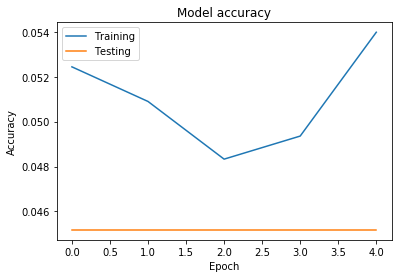

In [587]:
#visualise
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Testing'], loc='upper left')
plt.show()

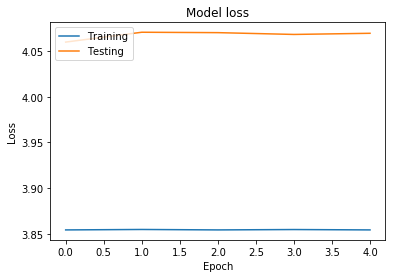

In [588]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Training', 'Testing'], loc='upper left') 
plt.show()

# CNN for pix_cd dataset

In [99]:
cd_X_CNN_train = cd_X_ANN_train
cd_X_CNN_test = cd_X_ANN_test
cd_Y_CNN_train = cd_Y_ANN_train
cd_Y_CNN_test = cd_Y_ANN_test

In [102]:
#reshape the pixels data and change in to floats
cd_X_CNN_train_reshape = cd_X_CNN_train.reshape(cd_X_CNN_train.shape[0], 100, 100,1)
cd_X_CNN_test_reshape = cd_X_CNN_test.reshape(cd_X_CNN_test.shape[0],100,100,1)

In [104]:
# change to float
cd_X_CNN_train_reshape = cd_X_CNN_train_reshape.astype('float32')
cd_X_CNN_test_reshape = cd_X_CNN_test_reshape.astype('float32')

In [105]:
cd_X_CNN_train_reshape /= 255
cd_X_CNN_test_reshape /=255
cd_X_CNN_train_reshape.shape

(1945, 100, 100, 1)

In [106]:
np.random.seed(123)

In [107]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from keras.utils import np_utils

In [109]:
#change the labels to categorial

cd_Y_CNN_train_cat = np_utils.to_categorical (cd_Y_CNN_train, 65)
cd_Y_CNN_test_cat = np_utils.to_categorical (cd_Y_CNN_test, 65)

In [401]:
#build the model

model1 = Sequential()

model1.add(Conv2D(32,(5,5), activation = 'relu', input_shape = (100,100,1)))
model1.add(Conv2D(64,(5,5), activation = 'relu'))
model1.add(MaxPooling2D(pool_size = (2,2)))
model1.add(Dropout(0.25))
model1.add(Flatten())
model1.add(Dense(500, activation = 'relu'))
model1.add(Dropout(0.5))
model1.add(Dense(65, activation = 'softmax'))

In [402]:
model1.summary()

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 96, 96, 32)        832       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 92, 92, 64)        51264     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 46, 46, 64)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 46, 46, 64)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 135424)            0         
_________________________________________________________________
dense_76 (Dense)             (None, 500)               67712500  
_________________________________________________________________
dropout_14 (Dropout)         (None, 500)             

In [403]:
#compile the model
model1.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [404]:
#fit the model on training data
n=1000
model1.fit(cd_X_CNN_train_reshape[:n], cd_Y_CNN_train_cat[:n],
         batch_size = 32, epochs = 5, verbose =1)

Epoch 1/5
1000/1000 [==============================] - 113s 113ms/step - loss: 3.3342 - accuracy: 0.3110
Epoch 2/5
1000/1000 [==============================] - 119s 119ms/step - loss: 0.9152 - accuracy: 0.7510
Epoch 3/5
1000/1000 [==============================] - 102s 102ms/step - loss: 0.3797 - accuracy: 0.8890
Epoch 4/5
1000/1000 [==============================] - 95s 95ms/step - loss: 0.2198 - accuracy: 0.9290
Epoch 5/5
1000/1000 [==============================] - 98s 98ms/step - loss: 0.1639 - accuracy: 0.9460


In [405]:
#evaluate the model
loss, accuracy = model1.evaluate(cd_X_CNN_test_reshape[:n], cd_Y_CNN_test_cat[:n], verbose=0)
print('Loss for pix_cd with 5 X 5 filter (n=1000) : ',loss,'\nAccuracy: ', accuracy*100)


#Loss for pix_cd with 5 X 5 filter :  6.989111995697021 #Accuracy:  34.99999940395355 (n=100)

#Loss for pix_cd with 5 X 5 filter (n=500) :  2.0575657243356567 #Accuracy:  63.655030727386475

Loss for pix_cd with 5 X 5 filter (n=1000) :  1.2446915809623516 
Accuracy:  71.66324257850647


In [406]:
# model with 3X3 filter
#build the model

model2 = Sequential()

model2.add(Conv2D(32,(3,3), activation = 'relu', input_shape = (100,100,1)))
model2.add(Conv2D(64,(3,3), activation = 'relu'))
model2.add(MaxPooling2D(pool_size = (2,2)))
model2.add(Dropout(0.25))
model2.add(Flatten())
model2.add(Dense(500, activation = 'relu'))
model2.add(Dropout(0.5))
model2.add(Dense(65, activation = 'softmax'))

In [407]:
model2.summary()

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 98, 98, 32)        320       
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 96, 96, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 48, 48, 64)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 147456)            0         
_________________________________________________________________
dense_78 (Dense)             (None, 500)               73728500  
_________________________________________________________________
dropout_16 (Dropout)         (None, 500)             

In [408]:
#compile the model
model2.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [409]:
#fit the model on training data
n=1000
model2.fit(cd_X_CNN_train_reshape[:n], cd_Y_CNN_train_cat[:n],
         batch_size = 32, epochs = 5, verbose =1)

Epoch 1/5
1000/1000 [==============================] - 99s 99ms/step - loss: 4.0358 - accuracy: 0.2550
Epoch 2/5
1000/1000 [==============================] - 109s 109ms/step - loss: 1.1358 - accuracy: 0.7130
Epoch 3/5
1000/1000 [==============================] - 103s 103ms/step - loss: 0.4269 - accuracy: 0.8870
Epoch 4/5
1000/1000 [==============================] - 114s 114ms/step - loss: 0.2422 - accuracy: 0.9290
Epoch 5/5
1000/1000 [==============================] - 118s 118ms/step - loss: 0.1544 - accuracy: 0.9580


In [410]:
#evaluate the model
loss, accuracy = model2.evaluate(cd_X_CNN_test_reshape[:n], cd_Y_CNN_test_cat[:n], verbose=0)
print('Loss for pix_cd with 3 X 3 filter (n=1000) : ',loss,'\nAccuracy: ', accuracy*100)
#Loss for pix_cd with 3 X 3 filter :  1.7374980904972774 #Accuracy:  62.628334760665894 (n=500)

Loss for pix_cd with 3 X 3 filter (n=1000) :  1.150816768101843 
Accuracy:  72.07392454147339


# Experiment 3: hog dataset

In [144]:
#load symbols_hog as hog
hog = pd.read_csv('Symbols_hog.csv', delimiter = ',', header=None)
#change to numpy array
hog = np.array(hog)
hog.shape

(2432, 1801)

In [145]:
#hog
hog
hogX = hog [:,:-1]
hogY = hog [:,-1:]
print(hogX)
print (hogY)
len(hogY) #2432

[[0.0 0.0 0.0 ... 0.0 0.0 0.0]
 [0.0 0.0 0.0 ... 0.0 0.0 0.0]
 [0.0 0.0 0.0 ... 0.0 0.0 0.0]
 ...
 [0.5000780402264127 0.0 0.0 ... 0.0 0.0 0.0]
 [0.6113406388917176 0.0 0.0 ... 0.0 0.0 0.0]
 [0.0 0.0 0.0 ... 0.0 0.0 0.0]]
[['Arrowhead']
 ['Arrowhead']
 ['Arrowhead']
 ...
 ['Vessel']
 ['Vessel']
 ['Vessel']]


2432

In [147]:
from sklearn import preprocessing

from sklearn import utils

lab_enc = preprocessing.LabelEncoder()

encoded = lab_enc.fit_transform(hogY)

hogY= encoded
print(hogY)
type(hogY)
hogY.shape
hogY = np.ravel(hogY)

[ 0  0  0 ... 38 38 38]


In [148]:
#split the dataset hog into 80:20
hogX_train, hogX_test, hogY_train, hogY_test = model_selection.train_test_split(hogX, hogY, train_size=0.80,test_size=0.20, random_state=42)

print('hog training X shape is:',hogX_train.shape)
print('hog training Y shape is:',hogY_train.shape)
print('hog testing X shape is:',hogX_test.shape)
print('hog testing Y shape is:',hogY_test.shape)

hog training X shape is: (1945, 1800)
hog training Y shape is: (1945,)
hog testing X shape is: (487, 1800)
hog testing Y shape is: (487,)


In [601]:
#SVM liner model
from sklearn.svm import SVC
model_svm = SVC(kernel = 'linear')
clf_svm = model_svm.fit(hogX_train, hogY_train)
svm_hog = model_svm.predict(hogX_test)


In [152]:
# random forest classifier
from sklearn.ensemble import RandomForestClassifier
model_rf_hog = RandomForestClassifier(n_estimators = 500, random_state = 42)
clf_rf_hog = model_rf_hog.fit(hogX_train, hogY_train)
rf_hog = model_rf_hog.predict(hogX_test)

In [153]:
from sklearn.metrics import accuracy_score
print('Accuracy score of SVM for hog dataset is: ', accuracy_score(svm_hog, hogY_test)*100)
print('Accuracy score of RF for hog dataset is: ', accuracy_score(rf_hog, hogY_test)*100)

Accuracy score of SVM for hog dataset is:  94.8665297741273
Accuracy score of RF for hog dataset is:  94.04517453798768


# ANN on hog dataset

In [154]:
print('hog training X shape is:',hogX_train.shape)
print('hog training Y shape is:',hogY_train.shape)
print('hog testing X shape is:',hogX_test.shape)
print('hog testing Y shape is:',hogY_test.shape)

hog training X shape is: (1945, 1800)
hog training Y shape is: (1945,)
hog testing X shape is: (487, 1800)
hog testing Y shape is: (487,)


In [155]:
hog_X_ANN_train = hogX_train
hog_X_ANN_test = hogX_test
hog_Y_ANN_train = hogY_train
hog_Y_ANN_test = hogY_test

In [160]:
#change the labels to categorical

from keras.utils.np_utils import to_categorical
hog_Y_ANN_train_cat = to_categorical(hog_Y_ANN_train)

hog_Y_ANN_test_cat = to_categorical(hog_Y_ANN_test)


In [161]:
np.random.seed(123)

In [453]:
# Neural network
hog_model = Sequential()
hog_model.add(Dense(64, input_dim=1800, activation='relu'))
hog_model.add(Dense(300, activation='relu'))
hog_model.add(Dense(39, activation='softmax'))

In [454]:
hog_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [455]:
history = hog_model.fit(hog_X_ANN_train, hog_Y_ANN_train_cat, epochs=20, batch_size=64)

Epoch 1/20
1945/1945 [==============================] - 2s 1ms/step - loss: 2.7540 - accuracy: 0.3039
Epoch 2/20
1945/1945 [==============================] - 1s 411us/step - loss: 1.5349 - accuracy: 0.6324
Epoch 3/20
1945/1945 [==============================] - 1s 412us/step - loss: 0.8907 - accuracy: 0.8129
Epoch 4/20
1945/1945 [==============================] - 1s 407us/step - loss: 0.5657 - accuracy: 0.8668
Epoch 5/20
1945/1945 [==============================] - 1s 412us/step - loss: 0.3872 - accuracy: 0.9100
Epoch 6/20
1945/1945 [==============================] - 1s 414us/step - loss: 0.2786 - accuracy: 0.9404
Epoch 7/20
1945/1945 [==============================] - 1s 406us/step - loss: 0.1975 - accuracy: 0.9671
Epoch 8/20
1945/1945 [==============================] - 1s 411us/step - loss: 0.1442 - accuracy: 0.9753
Epoch 9/20
1945/1945 [==============================] - 1s 416us/step - loss: 0.1088 - accuracy: 0.9805
Epoch 10/20
1945/1945 [==============================] - 1s 408us/

In [456]:
#prediction on testing set
hog_Y_pred = hog_model.predict(hog_X_ANN_test)
#Converting predictions to label
pred = list()
for i in range(len(hog_Y_pred)):
    pred.append(np.argmax(hog_Y_pred[i]))
#Converting one hot encoded test label to label
test = list()
for i in range(len(hog_Y_ANN_test_cat)):
    test.append(np.argmax(hog_Y_ANN_test_cat[i]))

In [457]:
from sklearn.metrics import accuracy_score
a = accuracy_score(pred,test)
print('Accuracy for hog dataset for ANN is:', a*100)

Accuracy for hog dataset for ANN is: 93.22381930184805


# Experiment 4: hog_ros dataset

In [177]:
#load Symbols_hog_ros as hog_ros:
hog_ros = pd.read_csv('Symbols_hog_ros.csv', delimiter = ',', header=None)

#change to numpy array
hog_ros = np.array(hog_ros)
hog_ros
hog_ros.shape

(15288, 1801)

In [602]:
#hog_ros
hog_ros
hog_rosX = hog_ros [:,:-1]
hog_rosY = hog_ros [:,-1:]

len(hog_rosY) #15288

15288

In [180]:
from sklearn import preprocessing

from sklearn import utils

lab_enc = preprocessing.LabelEncoder()

encoded = lab_enc.fit_transform(hog_rosY)
#print(encoded)

hog_rosY= encoded


print(hog_rosY)
type(hog_rosY)
hog_rosY.shape
hog_rosX
hog_rosY.shape
hog_rosY=np.ravel(hog_rosY)

[ 0  0  0 ... 38 38 38]


In [181]:
#split the dataset hog into 80:20
hog_rosX_train, hog_rosX_test, hog_rosY_train, hog_rosY_test = model_selection.train_test_split(hog_rosX, hog_rosY, train_size=0.80,test_size=0.20, random_state=42)

print ('hog_ros training X shape is:', hog_rosX_train.shape)
print ('hog_ros training Y shape is:', hog_rosY_train.shape)
print ('hog_ros testing X shape is:', hog_rosX_test.shape)
print ('hog_ros testing Y shape is:', hog_rosY_test.shape)

hog_ros training X shape is: (12230, 1800)
hog_ros training Y shape is: (12230,)
hog_ros testing X shape is: (3058, 1800)
hog_ros testing Y shape is: (3058,)


# SVM and RF

In [182]:
#SVM liner model
from sklearn.svm import SVC
model_svm = SVC(kernel = 'linear')
clf_svm = model_svm.fit(hog_rosX_train, hog_rosY_train)
svm_hog_ros = model_svm.predict(hog_rosX_test)

In [183]:
# random forest classifier
from sklearn.ensemble import RandomForestClassifier
model_rf_hog_ros = RandomForestClassifier(n_estimators = 500, random_state = 42)
clf_rf_hog_ros = model_rf_hog_ros.fit(hog_rosX_train, hog_rosY_train)
rf_hog_ros = model_rf_hog_ros.predict(hog_rosX_test)
print(rf_hog_ros, rf_hog_ros.shape)

[ 3 11 18 ... 28 19 38] (3058,)


In [184]:
from sklearn.metrics import accuracy_score
print('Accuracy score of SVM for hog_ros: ', accuracy_score(svm_hog_ros, hog_rosY_test)*100)
print('Accuracy score of RF for hog_ros: ', accuracy_score(rf_hog_ros, hog_rosY_test)*100)

Accuracy score of SVM for hog_ros:  99.9345977763244
Accuracy score of RF for hog_ros:  99.96729888816219


# ANN on hog_ros dataset

In [ ]:
print ('hog_ros training X shape is:', hog_rosX_train.shape)
print ('hog_ros training Y shape is:', hog_rosY_train.shape)
print ('hog_ros testing X shape is:', hog_rosX_test.shape)
print ('hog_ros testing Y shape is:', hog_rosY_test.shape)

In [191]:
rosX_ANN_train=hog_rosX_train
rosX_ANN_test=hog_rosX_test
rosY_ANN_train=hog_rosY_train
rosY_ANN_test=hog_rosY_test

In [193]:
#change the labels to categorical
from keras.utils.np_utils import to_categorical

rosY_ANN_train_cat = to_categorical(rosY_ANN_train)

rosY_ANN_test_cat = to_categorical(rosY_ANN_test)


In [194]:
np.random.seed(123)

In [458]:
# Neural network
ros_model = Sequential()
ros_model.add(Dense(64, input_dim=1800, activation='relu'))
ros_model.add(Dense(300, activation='relu'))
ros_model.add(Dense(39, activation='softmax'))

In [459]:
ros_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [460]:
history = ros_model.fit(rosX_ANN_train, rosY_ANN_train_cat, epochs=5, batch_size=64)

Epoch 1/5
12230/12230 [==============================] - 16s 1ms/step - loss: 1.0772 - accuracy: 0.7740
Epoch 2/5
12230/12230 [==============================] - 7s 598us/step - loss: 0.0823 - accuracy: 0.9868
Epoch 3/5
12230/12230 [==============================] - 7s 537us/step - loss: 0.0223 - accuracy: 0.9975
Epoch 4/5
12230/12230 [==============================] - 6s 502us/step - loss: 0.0087 - accuracy: 0.9997
Epoch 5/5
12230/12230 [==============================] - 6s 497us/step - loss: 0.0045 - accuracy: 0.9998


In [461]:
#prediction on testing set
ros_Y_pred = ros_model.predict(rosX_ANN_test)
#Converting predictions to label
pred = list()
for i in range(len(ros_Y_pred)):
    pred.append(np.argmax(ros_Y_pred[i]))
#Converting one hot encoded test label to label
test = list()
for i in range(len(rosY_ANN_test_cat)):
    test.append(np.argmax(rosY_ANN_test_cat[i]))

In [462]:
from sklearn.metrics import accuracy_score
a = accuracy_score(pred,test)
print('Accuracy for hog_ros dataset for ANN is:', a*100)

Accuracy for hog_ros dataset for ANN is: 99.9345977763244


In [276]:
history = ros_model.fit(rosX_ANN_train, rosY_ANN_train_cat,validation_data = (rosX_ANN_test,rosY_ANN_test_cat), epochs=5, batch_size=64)

Train on 12230 samples, validate on 3058 samples
Epoch 1/5
12230/12230 [==============================] - 8s 622us/step - loss: 3.6955e-05 - accuracy: 1.0000 - val_loss: 3.0608e-05 - val_accuracy: 1.0000
Epoch 2/5
12230/12230 [==============================] - 8s 618us/step - loss: 3.1818e-05 - accuracy: 1.0000 - val_loss: 2.6779e-05 - val_accuracy: 1.0000
Epoch 3/5
12230/12230 [==============================] - 7s 605us/step - loss: 2.7866e-05 - accuracy: 1.0000 - val_loss: 2.3970e-05 - val_accuracy: 1.0000
Epoch 4/5
12230/12230 [==============================] - 7s 602us/step - loss: 2.4677e-05 - accuracy: 1.0000 - val_loss: 2.1150e-05 - val_accuracy: 1.0000
Epoch 5/5
12230/12230 [==============================] - 8s 615us/step - loss: 2.2063e-05 - accuracy: 1.0000 - val_loss: 1.9015e-05 - val_accuracy: 1.0000


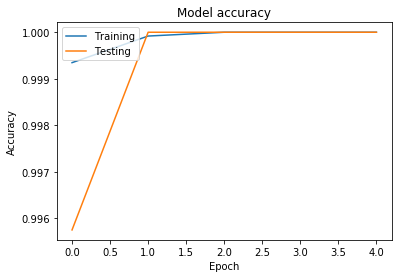

In [241]:
#visualise
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Testing'], loc='upper left')
plt.show()

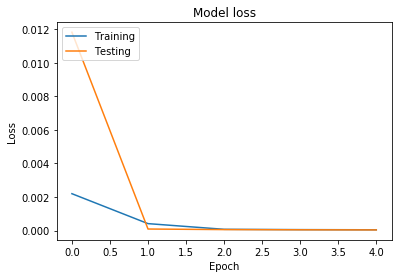

In [242]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Training', 'Testing'], loc='upper left') 
plt.show()

In [245]:
scores = ros_model.evaluate(rosX_ANN_test[test], rosY_ANN_test_cat[test], verbose = 0)
print(scores)

[4.5440787307252926e-05, 1.0]


# Experiment 5: lbp dataset

In [238]:
#load Symbols_lbp.csv as lbp:
lbp = pd.read_csv('Symbols_lbp.csv', delimiter = ',', header=None)
#change to numpy array
lbp = np.array(lbp)
lbp
lbp.shape

(2432, 27)

In [247]:
#lbp
lbp
lbpX = lbp [:,:-1]
lbpY = lbp [:,-1:]


In [249]:
from sklearn import preprocessing

from sklearn import utils

lab_enc = preprocessing.LabelEncoder()

encoded = lab_enc.fit_transform(lbpY)
#print(encoded)

lbpY= encoded


print(lbpY)
type(lbpY)
lbpY.shape
lbpX
lbpX.shape
lbpY.shape
lbpY = np.ravel(lbpY)

[ 0  0  0 ... 38 38 38]


In [250]:
#split the dataset hog into 80:20
lbpX_train, lbpX_test, lbpY_train, lbpY_test = model_selection.train_test_split(lbpX, lbpY, train_size=0.80,test_size=0.20, random_state=42)


In [255]:
print ('lbp training X shape is:' , lbpX_train.shape)
print ('lbp training Y shape is:' , lbpY_train.shape)
print ('lbp testing X shape is:' , lbpX_test.shape)
print ('lbp testing Y shape is:' , lbpY_test.shape)

lbp training X shape is: (1945, 26)
lbp training Y shape is: (1945,)
lbp testing X shape is: (487, 26)
lbp testing Y shape is: (487,)


In [252]:
#SVM liner model
from sklearn.svm import SVC
model_svm = SVC(kernel = 'linear')
clf_svm = model_svm.fit(lbpX_train, lbpY_train)
svm_lbp = model_svm.predict(lbpX_test)

In [253]:
# random forest classifier
from sklearn.ensemble import RandomForestClassifier
model_rf_lbp = RandomForestClassifier(n_estimators = 500, random_state = 42)
clf_rf_lbp = model_rf_lbp.fit(lbpX_train, lbpY_train)
rf_lbp = model_rf_lbp.predict(lbpX_test)

In [254]:
from sklearn.metrics import accuracy_score
print('Accuracy score of SVM for lbp: ', accuracy_score(svm_lbp, lbpY_test)*100)
print('Accuracy score of RF for lbp: ', accuracy_score(rf_lbp, lbpY_test)*100)

Accuracy score of SVM for lbp:  46.201232032854215
Accuracy score of RF for lbp:  98.15195071868584


# ANN for lbp dataset

In [260]:
print ('lbp training X shape is:' , lbpX_train.shape)
print ('lbp training Y shape is:' , lbpY_train.shape)
print ('lbp testing X shape is:' , lbpX_test.shape)
print ('lbp testing Y shape is:' , lbpY_test.shape)

lbp training X shape is: (1945, 26)
lbp training Y shape is: (1945,)
lbp testing X shape is: (487, 26)
lbp testing Y shape is: (487,)


In [537]:
lbpX_ANN_train = lbpX_train
lbpX_ANN_test = lbpX_test
lbpY_ANN_train = lbpY_train
lbpY_ANN_test = lbpY_test

In [548]:
#change the labels to categorical
from keras.utils.np_utils import to_categorical

lbpY_ANN_train_cat = to_categorical(lbpY_ANN_train)

lbpY_ANN_test_cat = to_categorical(lbpY_ANN_test)


In [551]:
np.random.seed(123)

In [552]:
# Neural network
lbp_model = Sequential()
lbp_model.add(Dense(64, input_dim=26, activation='relu'))
lbp_model.add(Dense(300, activation='relu'))
lbp_model.add(Dense(39, activation='softmax'))

In [574]:
lbp_model.compile(loss='categorical_crossentropy', optimizer= 'adam', metrics=['accuracy'])

In [575]:
history = lbp_model.fit(lbpX_ANN_train, lbpY_ANN_train_cat, epochs=5, batch_size=64)

Epoch 1/5
1945/1945 [==============================] - 0s 125us/step - loss: 1.0277 - accuracy: 0.6977
Epoch 2/5
1945/1945 [==============================] - 0s 48us/step - loss: 1.0006 - accuracy: 0.7270
Epoch 3/5
1945/1945 [==============================] - 0s 48us/step - loss: 0.9834 - accuracy: 0.7198
Epoch 4/5
1945/1945 [==============================] - 0s 59us/step - loss: 0.9632 - accuracy: 0.7198
Epoch 5/5
1945/1945 [==============================] - 0s 63us/step - loss: 0.9495 - accuracy: 0.7368


In [576]:
#prediction on testing set
lbp_Y_pred = lbp_model.predict(lbpX_ANN_test)

pred = list()
for i in range(len(lbp_Y_pred)):
    pred.append(np.argmax(lbp_Y_pred[i]))

test = list()
for i in range(len(lbpY_ANN_test_cat)):
    test.append(np.argmax(lbpY_ANN_test_cat[i]))

In [577]:
from sklearn.metrics import accuracy_score
a = accuracy_score(pred,test)
print('Accuracy for lbp dataset for ANN with adam is:', a*100)

Accuracy for lbp dataset for ANN with adam is: 70.2258726899384


# Results

Experiment 1 (pix dataset)

For the original pixels dataset, all classifiers were conducted. The SVM and RF gave an accuracy of 92.6% and 92.8% respectively. The accuracy results were not that different, so SVM and RF can both be used here. ANN for pix dataset gave an accuracy of 83.5%. In the training data the accuracy was 88% when using 5 epochs. 83.5% on the testing data is quite good. CNN gave an accuracy on the testing data  was 87.6% with a loss of 0.6 even though the accuracy on training data was 99% with 5 epochs. SVM and RF seem to be the most efficient classifier for this dataset. 


Experiment 2 (pix_cd dataset)
Class decomposition (cd) is the process by which the labels are further classed into subclasses by applying kmeans clustering forming more classes. Class decomposition is normally done to solve the problem of low variance classification method. Having many subclasses should have increased efficiency of the models used by identifying hidden patterns within the classes. 

Experiment 2 was conducted on pix_cd dataset with all classifiers. SVM and RF gave accuracy of 85% and 82% respectively. ANN gave an accuracy of 4.5% for pix_cd dataset. 
CNN gave an accuracy of 71.6%. For CNN, performance was lower (37%) when the n was 100. Accuracy was significantly increased to 71.6% when n was increased to 1000 using 5 X 5 filter. In addition the loss also went down. When 3 X 3 filter was used, performance of CNN also increased and gave an accuracy of 72 %. For pix_cd dataset, SVM and RF gave higher accuracies compared to other classifiers. However, various hyperparameters such as optimisers and activation functions could be tuned to increase the performance of the low performing classifiers. However, for ANN with pix_cd, even when changing the optimisers or N had no effect on accuracy. Lots of other hyperparameters could be tuned to make it perform better. 


Experiment 3 (hog dataset)
Histogram of Oriented Gradients (hog) is one of the feature descriptor used in image processing. This method is used for object detection. It extracts features out of the pixels. Hog descriptor and Linear support vector machine has been widely used to accurately train  to classify objects (Dalal and Triggs, 2005). 

Hog dataset  was used to perform the classifiers except CNN. SVM and RF gave accuracy of 94.8% and 94% respectively. ANN gave an accuracy of 93.2% for hog dataset. Accuracy on the testing set was 100%. For this dataset, any of the classifiers is good in terms of prediction accuracy. Hog goes through the image and look at gradients and converts the image into  feature vectors. 


Experiment 4 (hog_ros dataset)
Random oversampling is normally carried out for imbalanced data.  Oversampling helps the minority data by duplicating the minority data to balance the classes. However, in some models, this might cause overfitting. Random oversampling also reduces the majority class but this might cause the important information to be lost. 


For hog_ros dataset, SVM, RF and ANN was tested. Both SVM and RF gave an accuracy of 99.9%. ANN also gave accuracy of 99.9% on both training and testing dataset making all classifiers as the best performing one for this dataset. Random oversampling balances the classes by duplicating the minority class. This technique affects some machine learning algorithms and influence the fit of the model causing the overfitting of the model. Keeping record of the performance on training as well as testing data is useful in this context. 


Experiment 5 (lbp dataset)
Local binary patterns (LBP) is a method of texture or pattern descriptor where the pixels of an image are changed into binary patterns making them computationally efficient to work on (Ojala et al., 2002). Each pixel is compared to its neighbouring pixels and a local representation of texture is computed. This allows to capture very fine-grained details of the image which also has its own limitation. 

For lbp dataset, SVM, RF and ANN was carried out. SVM gave an accuracy of 46.2% but RF performed well with 98.1% accuracy. Accuracy of lbp was 70% with ANN  and did not change much when the optimiser was changed to ‘rmsprop’. Accuracy in training and testing data was also not much different. More parameter tuning and changing the number of epochs could have changed the accuracy for this classifier. 


# Conclusion

Conclusion
In these experiment, it can be seen that for hog_ros dataset, any of the classifier can perform well with an accuracy of almost 100%. For all the classifiers and datasets, it is possible to improve the performance of the models by tuning the hyper parameters (optimisers, activation function and learning rates) and improving the validation framework. Splitting the datasets could be improved by further splitting the training sets into validation set to validate the model’s performance on unseen data or using k-fold cross validation and looking at performance on each fold. Other metrics such as error rates could also be useful in deciding the best classifier as accuracy alone cannot be the perfect measure of the performance. Other measures such as precision, sensitivity and specificity might also be useful and looking at the statistical significance of the accuracy and loss of each of the classifiers would also be important. 

In addition, I did not have time to properly analyse and visualise the performance of all the classfiers statistically.


In [603]:

table = [['Exp1', 'Pix', 92.6, 92.8, 83.5, 87.6], ['Exp2', 'Pix_cd', 85, 82, 4.5, 71.6], ['Exp3', 'hog', 94.8, 94, 93.2], ['Exp 4', 'hog_ros', 99.9, 99.9, 99.9], ['Exp 5', 'lbp', 46.2, 98.1, 70.2]]
df = pd.DataFrame(table, columns=['Exp', 'Dataset', 'SVM_Accuracy%', 'RF_Accuracy%', 'ANN_Accuracy%', 'CNN_Accuracy%'])
df

,Exp,Dataset,SVM_Accuracy%,RF_Accuracy%,ANN_Accuracy%,CNN_Accuracy%
0,Exp1,Pix,92.6,92.8,83.5,87.6
1,Exp2,Pix_cd,85.0,82.0,4.5,71.6
2,Exp3,hog,94.8,94.0,93.2,NaN
3,Exp 4,hog_ros,99.9,99.9,99.9,NaN
4,Exp 5,lbp,46.2,98.1,70.2,NaN


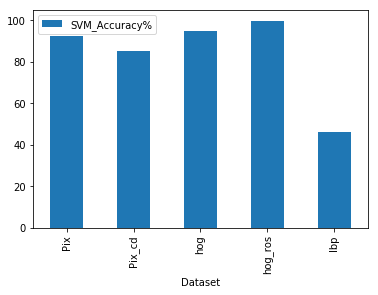

In [604]:
SVM_plot = df.plot(kind='bar', x = 'Dataset', y = 'SVM_Accuracy%')

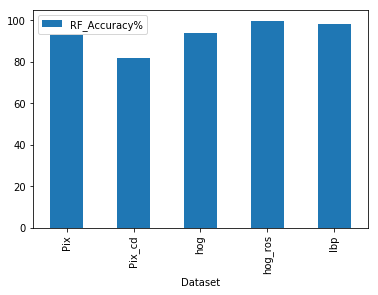

In [605]:
RF_plot = df.plot(kind='bar', x = 'Dataset', y = 'RF_Accuracy%')

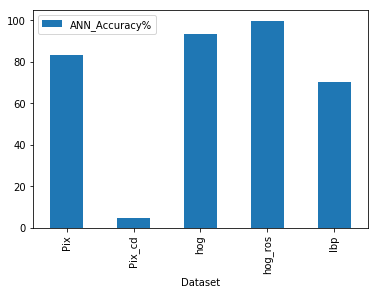

In [606]:
ANN_plot = df.plot(kind='bar', x = 'Dataset', y = 'ANN_Accuracy%')

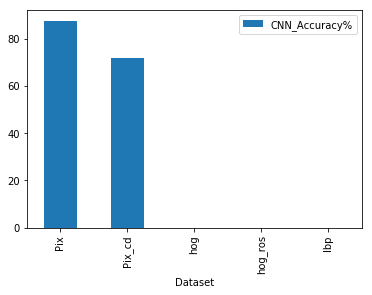

In [607]:
CNN_plot = df.plot(kind='bar', x = 'Dataset', y = 'CNN_Accuracy%')

# References

Dalal, N and Bill, T (2005). Histograms of Orientated Gradients for human Detection. IEEE Conference on Computer Vision and Pttern Recognition(CVPR 2005).2.

ELYAN, E; MORENO GARCIA, C and JAYNE, C 2018. Symbols classification in engineering drawings. In Proceedings of the 2018 International joint conference on neural networks (IJCNN 2018), 8-13 July 2018, Rio de Janeiro, Brazil. Piscataway, NJ: IEEE [online], article number 8489087.

Kingma, DP and Ba, J (2015). Adam: A method for Scochastic Optimization. ICLR 2015. 

Krizhevsky, A; Sutskever, I;  Hinton, G (2012). ImageNet Classification with Deep Convolutional Neural Networks. Neural Information Processing Systems. 25. 10.1145/3065386. 

Ojala, Timo ; Pietikäinen, Matti ; Maenpaa, T(2002). Multiresolution Gray-Scale and Rotation Invariant Texture Classification with Local Binary Patterns. Pattern Analysis and Machine Intelligence, IEEE Transactions on. 24. 971-987. 10.1109/TPAMI.2002.1017623. 